In [1]:
from scipy.stats import bernoulli
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("adult_dataset.csv")
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

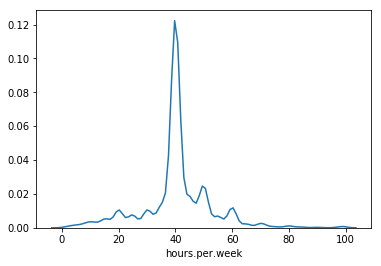

In [2]:

sns.distplot(df['hours.per.week'], hist=False)

plt.show()

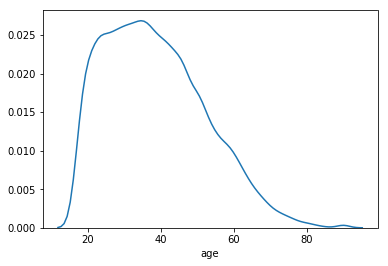

In [3]:

sns.distplot(df['age'], hist=False)

plt.show()

In [7]:
import numpy as np
# i am trying to initialise age to new dataframe
#meanage=np.mean(df['age'])
age=np.array(df['age'])
age=pd.DataFrame(df['age'])
d=pd.DataFrame(age)

In [8]:
print(d.head())

   age
0   90
1   82
2   66
3   54
4   41


In [9]:
from scipy.stats import zscore
dz=d.apply(zscore)
df['zage']=dz

In [ ]:
# z score
# inter quartile range

In [10]:
dz.head()

,age
0,3.769612
1,3.183112
2,2.010110
3,1.130359
4,0.177296


In [46]:
df['zage'].head()

0    3.769612
1    3.183112
2    2.010110
3    1.130359
4    0.177296
Name: zage, dtype: float64

In [11]:
# before removing outlier
len(df)

32561

In [12]:
# Z VALUE
age_in=df.loc[(df['zage']>-3) & (df['zage']<3)]

In [13]:
#after removing outlier
len(age_in)

32440

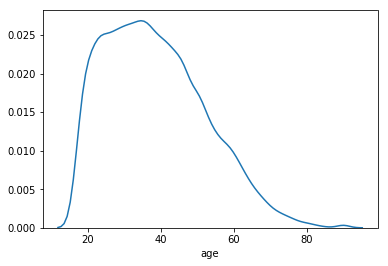

In [14]:
# BEFORE REMOVING OUTLIER
sns.distplot(df['age'], hist=False)

plt.show()

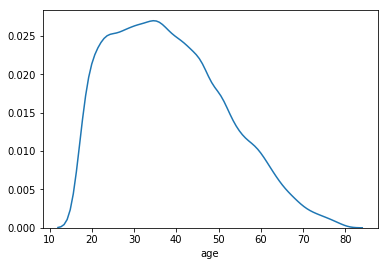

In [15]:
sns.distplot(age_in['age'], hist=False)

plt.show()

## using iqr for removing outlier

In [56]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(" Q1 IS ",Q1)
print(" Q3 IS ",Q3)
print("Q3+1.5* IQR is ", Q3+1.5* IQR) 
print("Q1-1.5*IQR is ",Q1-1.5*IQR)
#age_in = d[~(d > (Q1 - 1.5 * IQR)) |(d['age'] < (Q3 + 1.5 * IQR)).any(axis=1)]

 Q1 IS  28.0
 Q3 IS  48.0
Q3+1.5* IQR is  78.0
Q1-1.5*IQR is  -2.0


In [16]:
age_in.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,zage
count,32440.000000,3.244000e+04,32440.000000,32440.000000,32440.000000,32440.000000,32440.000000
mean,38.409155,1.898807e+05,10.083477,1077.960697,87.038502,40.482059,-0.012646
std,13.367250,1.055863e+05,2.568570,7395.791540,401.496483,12.302738,0.979988
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,-1.582206
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000,-0.775768
50%,37.000000,1.784780e+05,10.000000,0.000000,0.000000,40.000000,-0.115955
75%,47.000000,2.372932e+05,12.000000,0.000000,0.000000,45.000000,0.617171
max,79.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,2.963174
